In [3]:
%pip install wordcloud --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import csv
import gc
from pathlib import Path 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import seed
import plotly.express as px
import nltk


reference:
https://www.kaggle.com/code/michaelsammons/ukrainerussia-twitter-eda

In [5]:
pd.options.display.float_format = "{:,.2f}".format

# load dataset

csv_path = '/Users/petermorris/Desktop/teste/UkraineCombinedTweetsDeduped_FEB27.csv'
df = pd.read_csv(csv_path, 
                 index_col=0,
                 encoding='utf-8', 
                 quoting=csv.QUOTE_ALL)

# rows and columns of the data
print(df.shape)

#Print columns type
print (df.dtypes)

df.head().T

(357018, 17)
userid             int64
username          object
acctdesc          object
location          object
following          int64
followers          int64
totaltweets        int64
usercreatedts     object
tweetid            int64
tweetcreatedts    object
retweetcount       int64
text              object
hashtags          object
language          object
coordinates       object
favorite_count     int64
extractedts       object
dtype: object


,1141800,1141801,1141802,1141803,1141804
userid,1466752038960656385,1111276809302216710,1364735420236505088,597779527,1646145848
username,Curtin2Tiffany,5ela60,StatistWomen,OurTurnToRescue,DrWAVeSportCd1
acctdesc,I am just like everyone else. The universe ex...,الأب ..الأخ ..الجار ..الحبيب .. السديك,🇹🇷,"Issues: Threats to Democracy, Racism, GOP corr...","Addicted to News, Music, Cooking, Gardens, Out..."
location,"Colorado, USA",NaN,Cumhur İttifakı,NaN,USA
following,253,167,1771,4847,5002
followers,40,9,1766,4080,3950
totaltweets,94,656,37009,33666,466629
usercreatedts,2021-12-03 12:52:22.000000,2019-03-28 14:40:12.000000,2021-02-25 00:35:28.000000,2012-06-02 21:53:59.000000,2013-08-04 21:07:08.000000
tweetid,1497724980259262467,1497724980271984641,1497724980322349058,1497724980573966346,1497724980653694976
tweetcreatedts,2022-02-27 00:07:16,2022-02-27 00:07:16,2022-02-27 00:07:16,2022-02-27 00:07:16,2022-02-27 00:07:16


In [6]:
df.shape

(357018, 17)

In [7]:
df.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts'],
      dtype='object')

# Language analysis

In [8]:
df.language.value_counts()

en     227513
fr      19402
es      16227
de      16199
und     13800
        ...  
si          5
sd          2
is          2
km          1
hy          1
Name: language, Length: 62, dtype: int64

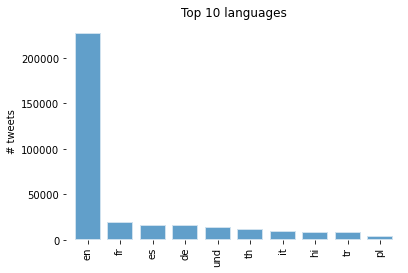

In [9]:
df.language.value_counts()[0:10].plot(kind='bar',
                                    width=.8, 
                                    edgecolor='white', 
                                    #color='lightblue',
                                    ylabel= '# tweets',
                                    linewidth=2,
                                    alpha = 0.7)
plt.title('Top 10 languages')
#plt.legend(loc=0)
plt.box(False)
plt.show()

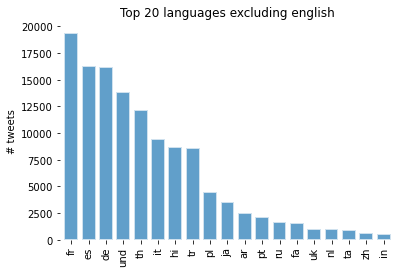

In [10]:
df.language.value_counts()[1:20].plot(kind='bar',
                                    width=.8, 
                                    edgecolor='white', 
                                    #color=['orange','red'],
                                    ylabel= '# tweets',
                                    linewidth=2,
                                    alpha = 0.7)
plt.title('Top 20 languages excluding english')
#plt.legend(loc=0)
plt.box(False)
plt.show()

# Location analysis

In [11]:
df.location.value_counts()

United States                     2601
India                             2482
France                            1496
London, England                   1142
Paris, France                     1070
                                  ... 
Classified                           1
Oil City, PA USA                     1
MonsterFam Discord👇🏻                 1
West Kelowna, British Columbia       1
sinsini jat land of bharatpur        1
Name: location, Length: 62470, dtype: int64

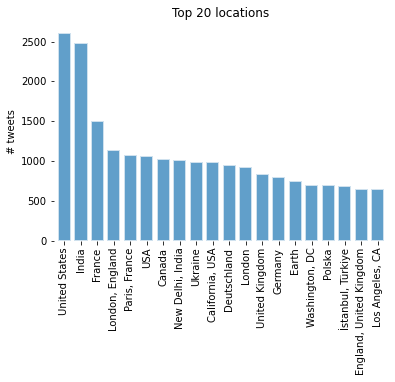

In [12]:
df.location.value_counts()[0:20].plot(kind='bar',
                                    width=.8, 
                                    edgecolor='white', 
                                    #color='lightblue',
                                    ylabel= '# tweets',
                                    linewidth=2,
                                    alpha = 0.7)
plt.title('Top 20 locations')
#plt.legend(loc=0)
plt.box(False)
plt.show()

# Date of user creation

In [13]:
df.usercreatedts.value_counts()

2021-08-18 06:44:09.000000    259
2016-06-29 17:26:33.000000    193
2020-01-27 14:11:32.000000    151
2021-12-14 23:50:44.000000    132
2009-04-14 07:13:06.000000     96
                             ... 
2020-11-07 17:55:12.000000      1
2018-03-25 02:40:43.000000      1
2021-09-23 04:01:45.000000      1
2010-09-24 01:59:01.000000      1
2019-10-30 15:14:02.000000      1
Name: usercreatedts, Length: 247212, dtype: int64

# Corpus

Reference 

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

In [14]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
stopwords = set(STOPWORDS)
# stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Lower strings

In [16]:
df['text'] = df['text'].astype(str).str.lower()
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#ukrainerussiawar captured russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#ukrayna güvenlik servisi, #rus finosu #kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979
1141803,597779527,OurTurnToRescue,"Issues: Threats to Democracy, Racism, GOP corr...",NaN,4847,4080,33666,2012-06-02 21:53:59.000000,1497724980573966346,2022-02-27 00:07:16,1,we elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,NaN,0,2022-02-27 00:09:33.051823
1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,2013-08-04 21:07:08.000000,1497724980653694976,2022-02-27 00:07:16,277,ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0,2022-02-27 00:09:33.043812


Tokenization
Install nltk:

conda install -c anaconda nltk
We use nltk’s RegexpTokenizer to perform tokenization in combination with regular expressions.

To learn more about regular expressions (“regexp”), visit the following sites:

regular expression basics.
interactive regular expressions tool
\w+ matches Unicode word characters with one or more occurrences; this includes most characters that can be part of a word in any language, as well as numbers and the underscore.


In [17]:
from nltk.tokenize import RegexpTokenizer

In [18]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#ukrainerussiawar captured russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,"[ukrainerussiawar, captured, russian, soldiers..."
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,"[like, everybody, else, i, am, rooting, for, u..."
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#ukrayna güvenlik servisi, #rus finosu #kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,"[ukrayna, güvenlik, servisi, rus, finosu, kadi..."


## Stopwords
Stop words are words in a stop list which are dropped before analysing natural language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, …).

In [19]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/petermorris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

We use a lambda function to remove the stopwords:

## Remove stopwords

In [21]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#ukrainerussiawar captured russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,"[ukrainerussiawar, captured, russian, soldiers..."
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,"[like, everybody, else, rooting, ukraine, figh..."
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#ukrayna güvenlik servisi, #rus finosu #kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,"[ukrayna, güvenlik, servisi, rus, finosu, kadi..."


## Remove infrequent words
We remove words which occur less then two times. Note that this operation changes the data format of our column text_token (notice the missing brackets).

In [22]:
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#ukrainerussiawar captured russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,ukrainerussiawar captured russian soldiers sai...
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,like everybody else rooting ukraine fight russ...
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#ukrayna güvenlik servisi, #rus finosu #kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,ukrayna güvenlik servisi rus finosu kadirov ko...


## Corpus of tweets classified as english language

In [23]:
all_words = ' '.join([word for word in df['text_token'][df.language=="en"]])

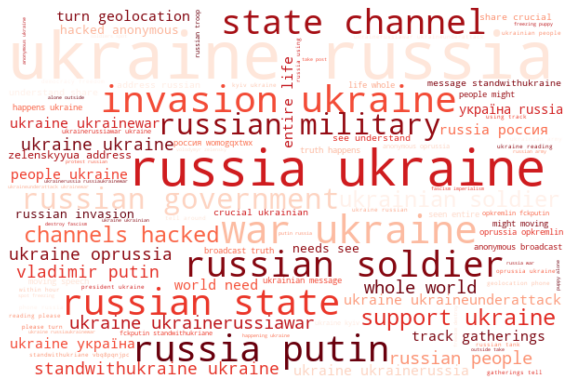

In [37]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     max_words=100,
                     background_color="white",
                     colormap="Reds",
                     #repeat=False,
                     #collocations=False,
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

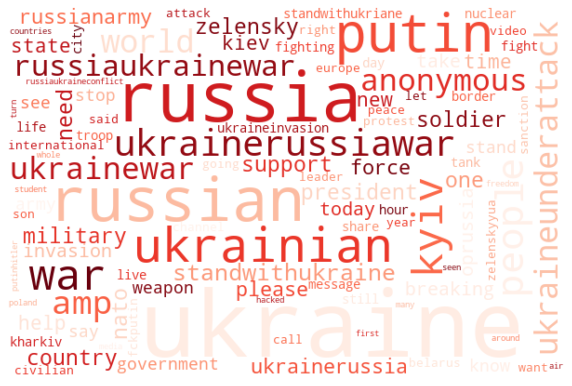

In [38]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     max_words=100,
                     background_color="white",
                     colormap="Reds",
                     repeat=False,
                     collocations=False,
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Reference
https://www.datacamp.com/community/tutorials/wordcloud-python

In [25]:
tank_mask = np.array(Image.open("/Users/petermorris/Downloads/tank.png"))
tank_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [26]:
# def transform_format(val):
#    if val == 0:
#        return 255
#    else:
#        return val

In [27]:
# Transform your mask into a new one that will work with the function:
# transformed_tank_mask = np.ndarray((tank_mask.shape[0],tank_mask.shape[1]), np.int32)

# for i in range(len(tank_mask)):
#    transformed_tank_mask[i] = list(map(transform_format, tank_mask[i]))

In [28]:
# Check the expected result of your mask
# transformed_tank_mask

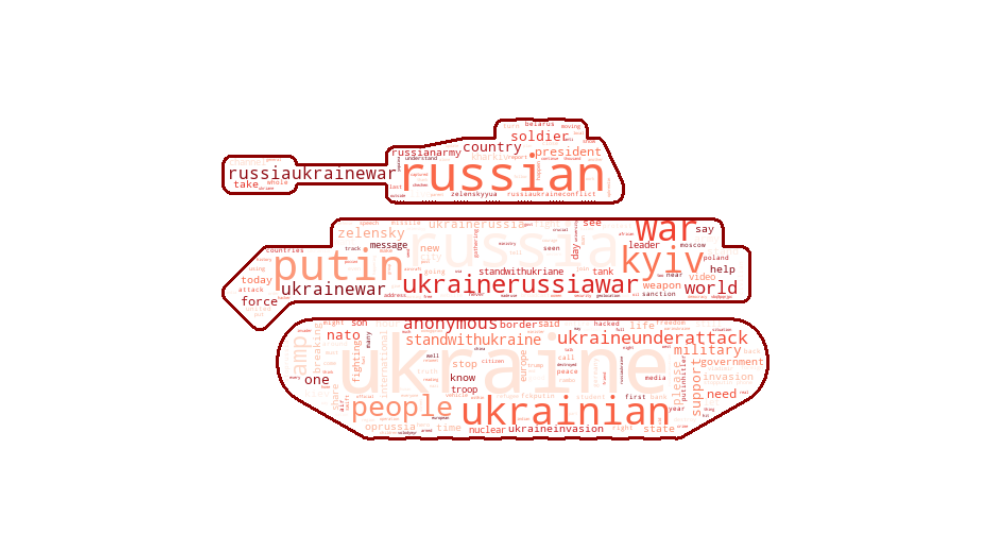

In [46]:
# Create a word cloud image
wc = WordCloud(background_color="white", 
               max_words=1000, 
               mask=tank_mask,
               contour_width=3, 
               colormap="Reds",
               repeat=False,
               collocations=False,
               contour_color='darkred')

# Generate a wordcloud
wc.generate(all_words)
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
# plt.title('Tweets on 27 Feb 2022')
plt.axis("off")
plt.show()

# Common Words

## Frequency distribuiton

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/petermorris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

## Most common words

In [32]:
fd.most_common(20)

[('ukraine', 197156),
 ('russia', 95803),
 ('russian', 66044),
 ('putin', 54015),
 ('ukrainian', 34994),
 ('kyiv', 34247),
 ('war', 34227),
 ('people', 27898),
 ('ukrainerussiawar', 25712),
 ('amp', 21844),
 ('ukraineunderattack', 19207),
 ('world', 18889),
 ('anonymous', 17533),
 ('ukrainewar', 17479),
 ('russiaukrainewar', 16752),
 ('standwithukraine', 15950),
 ('nato', 13021),
 ('military', 12963),
 ('country', 11999),
 ('support', 11991)]

## Plot common words

In [33]:
# Obtain top 20 words
top_20 = fd.most_common(20)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_20))

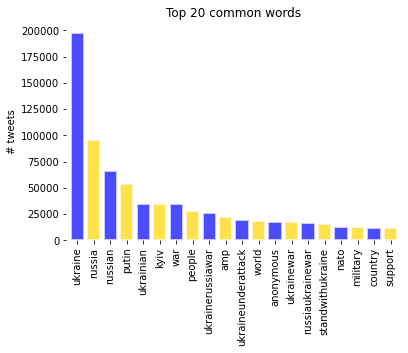

In [34]:
fdist.plot(kind='bar',
                width=.8, 
                edgecolor='white', 
                color=['blue','gold'],
                ylabel= '# tweets',
                linewidth=2,
                alpha = 0.7)
plt.title('Top 20 common words')
#plt.legend(loc=0)
plt.box(False)
plt.show()